In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw05.ipynb")

# Getting serious about missing values
So far, we've covered the basics of data preparation and how the way we deal with missing values can affect results. Let's work through some scenerios that can occur in practice. 

Alas, sometimes you just can't get away with ignoring missing values. The most common situation is when you're comparing two time series. There are several "aesthetics" for dealing with missing values, some of which we've studied and others of which we haven't. *Imputation* is a fancy word for computing reasonable replacements for missing values. 

In this exercise, I am going to give you the data analysis code and you will create data for which that code is not suitable, and explain why. Think of this as "Jeopardy for data". 

Hint: to type a NaN into a list, use `np.nan`. E.g., `[ 1, 2, 3, np.nan, 4 ]`

To help you with thinking, I took the liberty of visualizing your results. 

For an overview, see https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

In [2]:
# Run this first to load all libraries. 
import numpy as np
import pandas as pd

<!-- BEGIN QUESTION -->

*Question 1:* In the code cell below, define a Series with a column x having missing values, for which linear interpolation adversely affects the accuracy of data analysis. Then describe how the interpolation method changes results in the text cell below. 

By the word itself, linear interpolation works best if the data is linear. However, the data I created are points that follow a non-linear, polynomial trend. Any NaN minimum/maximum values that lies in a gap between two
measured values will be poorly estimated, as linear interpolation will overestimate local minimas and underestimate maximas. Furthermore, it will do poorly on consecutive missing data points.

<AxesSubplot:>

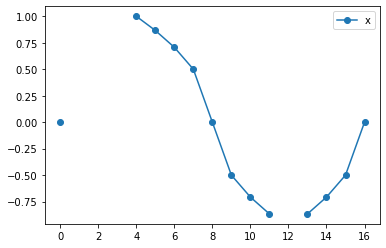

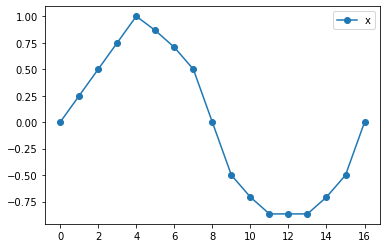

In [3]:
# first define a column x with some missing (NaN) values. 
import math as m
x = pd.Series([0,np.nan,np.nan,np.nan,1,m.sqrt(3)/2,1/m.sqrt(2),1/2,0,-1/2,-1/m.sqrt(2),-m.sqrt(3)/2,np.nan,-m.sqrt(3)/2,-1/m.sqrt(2),-1/2, 0])
# then I will create a DataFrame with these series and interpolate. 
# I will use an artificial time stamp for simplicity, and assume equal time intervals. 
ex1 = x.to_frame(name='x')
im1 = ex1.copy()
im1['x'] = im1['x'].interpolate(method='linear', limit_direction='forward', axis=0)
import matplotlib as mpl 
ex1.plot(style='o-')
im1.plot(style='o-')

In [4]:
# How does this change results?

In [5]:
grader.check("q1")

q1 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 2:* For your example from Question 1, describe a method for dealing with NaNs that doesn't suffer from the weakness you pointed out in question 1. Give code for this method in the code cell below below. 

instead of doing linear interpolation, we can use polynomial interpolation of higher degree (ex.order3). This solves the problem because using higher degree polynomials allow us to better define more complex non-linear shapes; The curve is also much smoother than what is obtained by linear interpolation, better estimating minimas and maximas.

<AxesSubplot:>

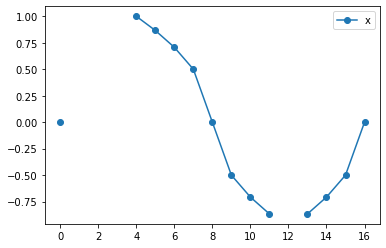

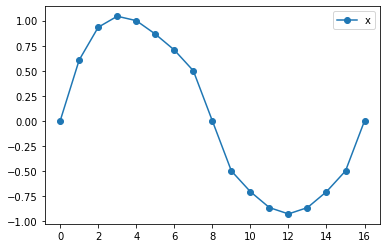

In [6]:
im1 = ex1.copy()
# Use some strategy to eliminate NaNs from im1 here. 
im1['x'] = im1['x'].interpolate(method='polynomial', order=3, limit_direction='forward', axis=0)
# Then let's look at the results.  
ex1.plot(style='o-')
im1.plot(style='o-')

In [7]:
# How does this address the problem?

In [8]:
grader.check("q2")

q2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 3:*  When dealing with categorical data, e.g., an integer from 1 to 5, it's sometimes considered wise to replace the missing values with the most frequent value: the so-called *mode* of the data. Give an example of how doing this can seriously compromise the accuracy of a poll. Explain why in the text box below. 

FYI: it is considered good practice to allow anyone to refuse to answer any question of a poll and simply leave it blank. That is how this situation might arise. 

In this example, the missing values are dependent on the categorical data 1-5. The poll is a survey that asks about people's incomes. If 1 is the lowest range of income and 5 is the highest, we would expect the lower values (1 or 2) to be missing; This is because people with lower incomes are less likely to respond to the question and leave it blank. Using mode to replace missing values will change the statistical nature of the data as it further skewes the data to be more left skewed indicating more highly-incomed people. It also underestimates the variance in the data since the mode stratgey will make all missing values the same.

mode = 5.0


<AxesSubplot:ylabel='Frequency'>

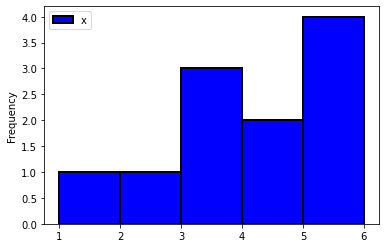

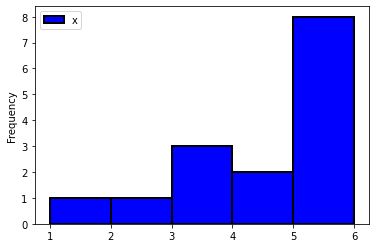

In [9]:
# Define some results for categorical data values 1-5, in a Series c. 
c = pd.Series([1, np.nan, np.nan, np.nan, 2, np.nan, 3, 3, 3, 4, 4, 5, 5, 5, 5])
# Now I'll compute the mode and fill in NaNs with data. 
ex2 = c.to_frame(name='x')
im2 = ex2.copy()
mode = im2['x'].mode()[0]  # pick first one if there's more than one 
print("mode = {}".format(mode))
im2 = im2.fillna(mode)
# Now I'll plot the results as two plots. 
ex2.plot.hist(bins=range(1,7), facecolor='b', edgecolor='k', linewidth=2)  # Ticks are 1-6 on x axis
im2.plot.hist(bins=range(1,7), facecolor='b', edgecolor='k', linewidth=2)  # Ticks are 1-6 on x axis

In [10]:
grader.check("q3")

q3 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 4:* For the example you gave in question 3, what strategy for NaNs would eliminate the problem? Explain why in the cell below, then implement your solution in the next cell. 

We know that the values that are missing are most likely not random, so it is not a good idea to delete rows with NaNs as we would have a high chance of removing a whole class of low-incomed participants. It is also not a good idea to replace Nan with the median or mean as it will most likely result in a category of middle to high income people. So, it is best to create another category, 6, that indicates a person that refuses to respond. By treating the missing data as just another category, we can prevent data loss that will not create any bias in future analysis of this poll.

<AxesSubplot:ylabel='Frequency'>

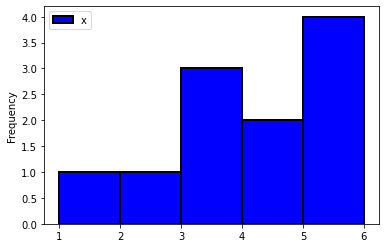

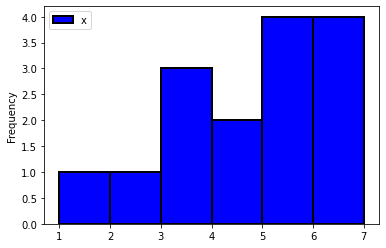

In [11]:
from functools import reduce
im2 = ex2.copy()
# perform your method here for im2. 
im2 = im2.fillna(6)
...
# Now I'll plot the results as two plots. 
ex2.plot.hist(bins=range(1,7), facecolor='b', edgecolor='k', linewidth=2)  # Ticks are 1-6 on x axis
im2.plot.hist(bins=range(1,8), facecolor='b', edgecolor='k', linewidth=2)  # Ticks are 1-6 on x axis
# Why does this work? 

In [12]:
grader.check("q4")

q4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 5:* Give a real-life example in which backfilling is the best way to handle NaN. 

Backfilling can be very helpful in financial analysis. For example, we have historical data of the prices of the stock over some time. However there are some gaps/NaN in between because no trading occured, thus no price for the stock. If we want to do any statistic computation and analyze the stock for example on a day to day basis, backfilling is the best approach because it gives the best assumption of the price.

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [13]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

You are not done until you upload the exported zipfile to GradeScope.

In [14]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)